## Random Forest Classifier

### Varying hyperparameters:

In [1]:
import numpy as np

train = np.genfromtxt('train_2008.csv', delimiter=',')
X_train = train[1:, :-1]
y_train = train[1:, -1]
X_test = np.genfromtxt('test_2008.csv', delimiter=',')[1:,:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
num_folds = 5
kf = KFold(n_splits=num_folds)

accuracies = []

for min_leaf in range (1, 30, 2):
    for depth in range (25, 65, 5):
        # Iterate through cross-validation folds:
        i = 1
        train_acc = 0
        test_acc = 0
        for train_index, test_index in kf.split(X_train):

            # Print out test indices:
            print('Fold ', i, ' of ', num_folds, '-',)# ' test indices:', test_index)

            # Training and testing data points for this fold:
            x_train_subset, x_test_subset = X_train[train_index], X_train[test_index]
            y_train_subset, y_test_subset = y_train[train_index], y_train[test_index]



            trees_subset = RandomForestClassifier(n_estimators=100, 
                                       max_depth= depth, 
                                       min_samples_leaf = min_leaf)
            trees_subset.fit(x_train_subset, y_train_subset)

            y_subset_predict = trees_subset.predict_proba(x_test_subset)
            y_train_subset_predict = trees_subset.predict_proba(x_train_subset)
            test1_acc = roc_auc_score(y_test_subset, y_subset_predict[:,1])
            train1_acc = roc_auc_score(y_train_subset, y_train_subset_predict[:,1])
            
            print ("this fold test_acc: ", test1_acc)
            print ("this fold train_acc: ", train1_acc)
            test_acc += test1_acc
            train_acc += train1_acc
            i += 1
        print ("depth: ", depth)
        print ("min_leaf: ", min_leaf)
        print ("test acc: ", test_acc/num_folds)
        print ("train acc: ", train_acc/num_folds)
        accuracies.append([min_leaf, depth, train_acc/num_folds, test_acc/num_folds])
        

In [77]:
print(accuracies)

[[ 1.         35.          0.99999999  0.77158423]
 [ 1.         40.          1.          0.77176298]
 [ 1.         45.          1.          0.77049723]
 [ 1.         50.          1.          0.77242836]
 [ 1.         55.          1.          0.77218528]
 [ 1.         60.          1.          0.7716527 ]
 [ 3.         35.          0.9933017   0.7747062 ]
 [ 3.         40.          0.99352728  0.77542578]
 [ 3.         45.          0.99347972  0.77505205]
 [ 3.         50.          0.9936236   0.77475945]
 [ 3.         55.          0.99366925  0.77525896]
 [ 3.         60.          0.99355152  0.77400985]
 [ 5.         35.          0.96637184  0.77520235]
 [ 5.         40.          0.96653835  0.77568005]
 [ 5.         45.          0.96629894  0.77485697]
 [ 5.         50.          0.96670894  0.77548334]
 [ 5.         55.          0.96641633  0.77611133]
 [ 5.         60.          0.96664066  0.77577587]
 [ 7.         35.          0.93904513  0.77547225]
 [ 7.         40.          0.93

### Plotting hyperparameters with train and test accuracy

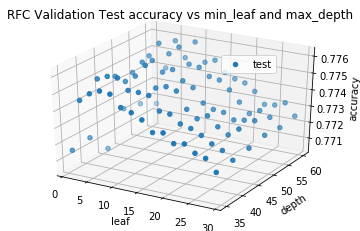

In [54]:
from mpl_toolkits import mplot3d
accuracies = np.array(accuracies)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

graph_leaf = accuracies[:,0]
graph_depth = accuracies[:,1]
graph_train = accuracies[:,2]
graph_test = accuracies[:,3]

ax1 = plt.axes(projection='3d')
ax1.set_xlabel('leaf')
ax1.set_ylabel('depth')
ax1.set_zlabel('accuracy')
ax1.set_title("RFC Validation Test accuracy vs min_leaf and max_depth")
ax1.scatter(graph_leaf, graph_depth, graph_test, 'blue', label='test')
ax2.scatter(graph_leaf, graph_depth, graph_train, 'green', label='train')
ax1.legend(loc="upper right", bbox_to_anchor=(0.3, 0.3, 0.5, 0.5))


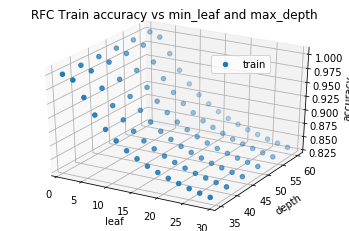

In [46]:

ax2 = plt.axes(projection='3d')
ax2.set_xlabel('leaf')
ax2.set_ylabel('depth')
ax2.set_zlabel('accuracy')
ax2.set_title("RFC Train accuracy vs min_leaf and max_depth")
ax2.scatter(graph_leaf, graph_depth, graph_train, 'green', label='train')
ax2.legend(loc="upper right", bbox_to_anchor=(0.3, 0.3, 0.5, 0.5))


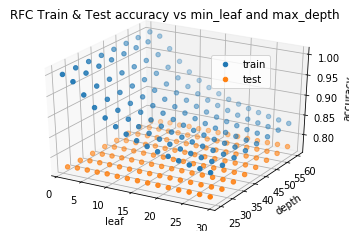

In [78]:
ax3 = plt.axes(projection='3d')
ax3.set_xlabel('leaf')
ax3.set_ylabel('depth')
ax3.set_zlabel('accuracy')
ax3.set_title("RFC Train & Test accuracy vs min_leaf and max_depth")
ax3.scatter(graph_leaf, graph_depth, graph_train, 'green', label='train')
ax3.scatter(graph_leaf, graph_depth, graph_test, 'green', label='test')
ax3.legend(loc="upper right", bbox_to_anchor=(0.3, 0.3, 0.5, 0.5))

### Getting optimal hyperparameters

In [52]:
print(accuracies[np.argmax(accuracies[:,3])])

[ 5.         55.          0.96641633  0.77611133]


### Final model for RFC

In [ ]:
import numpy as np
train = np.genfromtxt('train_2008.csv', delimiter=',')
X_train = train[1:, :-1]
y_train = train[1:, -1]
X_test = np.genfromtxt('test_2012.csv', delimiter=',')[1:,:]
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators=10000, max_depth=55, min_sample_leaf=5)
tree.fit(X_train, y_train)
y_train_predict = tree.predict_proba(X_train)
y_test_predict = tree.predict_proba(X_test)
print("model accuracy: ", roc_auc_score(y_train, y_predict[:,1]))


In [16]:
output = []
output.append(["id", "target"])
for i in range(len(y_test_predict)):
    output.append([i, y_test_predict[i][1]])

In [18]:
import csv
with open('voter_pred_2008.csv', mode='w') as voter_file:
    voter_writer = csv.writer(voter_file, delimiter=",")
    for i in output:
        voter_writer.writerow(i)

### Getting an idea of tree depths

In [20]:
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)
print([dectree_max_depth(t.tree_) for t in trees.estimators_])

[59,
 51,
 50,
 53,
 51,
 47,
 43,
 50,
 50,
 43,
 49,
 47,
 47,
 48,
 48,
 47,
 57,
 51,
 54,
 56,
 51,
 55,
 56,
 48,
 49,
 47,
 51,
 48,
 51,
 46,
 51,
 41,
 43,
 49,
 46,
 53,
 52,
 46,
 59,
 50,
 53,
 61,
 46,
 46,
 48,
 47,
 53,
 50,
 49,
 49,
 49,
 53,
 49,
 46,
 54,
 50,
 49,
 51,
 54,
 47,
 58,
 45,
 47,
 47,
 49,
 52,
 64,
 48,
 45,
 49,
 54,
 45,
 50,
 51,
 49,
 51,
 58,
 45,
 46,
 50,
 44,
 49,
 53,
 45,
 53,
 58,
 47,
 49,
 54,
 45,
 46,
 55,
 51,
 48,
 54,
 51,
 45,
 46,
 50,
 46,
 46,
 46,
 55,
 52,
 56,
 53,
 53,
 44,
 49,
 57,
 49,
 54,
 50,
 42,
 49,
 51,
 53,
 51,
 51,
 53,
 52,
 48,
 52,
 53,
 53,
 53,
 48,
 52,
 52,
 48,
 52,
 54,
 50,
 47,
 48,
 54,
 45,
 51,
 44,
 45,
 55,
 50,
 43,
 63,
 52,
 55,
 46,
 48,
 49,
 49,
 48,
 47,
 49,
 52,
 45,
 50,
 47,
 46,
 49,
 48,
 49,
 61,
 54,
 59,
 50,
 56,
 44,
 47,
 48,
 50,
 49,
 49,
 55,
 53,
 54,
 63,
 55,
 49,
 47,
 48,
 49,
 58,
 53,
 48,
 55,
 54,
 59,
 54,
 50,
 54,
 47,
 48,
 51,
 50,
 52,
 45,
 44,
 46,
 54,
 51]

## AdaBoost with gridsearch final code

In [ ]:
# Code for Adaboost (With gridsearch)
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

## Importing the MNIST dataset using Keras
train = np.genfromtxt('train_2008.csv', delimiter=',')
X_train = train[1:, :-1]
y_train = train[1:, -1]
X_test = np.genfromtxt('test_2012.csv', delimiter=',')[1:,:]

# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Perform a grid search across parameters
param_dist = {
 'n_estimators': [350, 400, 450, 500],
 'learning_rate' : [0.6, 0.7, 0.8, 0.9, 1]
 }

pre_gs_inst = GridSearchCV(AdaBoostClassifier(), param_grid = param_dist, verbose=20, cv=KFold(n_splits=3, shuffle=True))

# Fit best model
pre_gs_inst.fit(X_train, y_train)
print(pre_gs_inst.best_params_)


# How to fit just one clf
tree = AdaBoostClassifier(n_estimators=320, learning_rate=0.9)
tree.fit(X_train, y_train)
print("model accuracy: ", tree.score(X_train, y_train))

y_predict = tree.predict_proba(X_test)

## Logistic Regression Code

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# load and make training / testing data
train = np.genfromtxt('train_2008.csv', delimiter=',')
X_train = train[1:, :-1]
y_train = train[1:, -1]
X_test = np.genfromtxt('test_2008.csv', delimiter=',')[1:,:]

clf = LogisticRegression(solver='sag', max_iter=5000)
clf.fit(X_train, y_train)
y_test = clf.predict_proba(X_test)
